In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, ConfusionMatrixDisplay, classification_report, auc, precision_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

1. Data Preprocessing 

    database info(), describe(), shape
    

2. Find Categorical and Numerical features 

    Find categorical and numerical features in dataset 
    

3. Cardinality check for Categorical features

    find unique values in each categorical feature 
    

4. Handling Missing Values

    fill NA values using mode(), mean() or median()
    

5. Outlier detection and treatment 

    detect outlier and create function to remove them 
    

6. Exploratory Data Analysis

    Explore the Target Value plot 
    

7. Encoding Categorical features (for logistic regression)

    convert categorical data to numerical data using feature encoding
    

8. Find Correlation 

    using corr() find features' relationship 
    

9. Find importance features

    finding relevant features to build a model 
    

10. Train Test split

    using train_test_split() to split data into training and testing sets
    

11. Feature Scaling 

    scale data of each column to a common level (use StandardScaler)
    

12. Model Build and Evaluation 

    Logistic Regression algorithm for model build and accuarcy_score() for Model Evaluation, finally use confusion matrix for summarise performance 
    
    
13. Save Model 

In [40]:
db = pd.read_csv('weatherAUS.csv')

In [41]:
print(db.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [42]:
print(db.describe(exclude="O"))      
print(db.describe(include="O"))
print(db.shape)


             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [43]:
# Categorical featues 
Categorical = [col for col in db.columns if db[col].dtype=="O"]
# Numerical features 
Numerical = [col for col in db.columns if db[col].dtype!="O"]

print("Categorical Features: ", Categorical)
print("Numerical Features: ", Numerical)

Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [44]:
# find the unique values in each categorical feature
for each_feature in Categorical:
    unique_values = db[each_feature].unique()
    print("{} has {} unique values.".format(each_feature, len(unique_values)))

Date has 3436 unique values.
Location has 49 unique values.
WindGustDir has 17 unique values.
WindDir9am has 17 unique values.
WindDir3pm has 17 unique values.
RainToday has 3 unique values.
RainTomorrow has 3 unique values.


### from Cardinality summary 
- Date has the most number of unique values 

In [45]:
# introduce separate Date, month, year column from original db[Date]
# first convert the original date using to_datetime
db['Date'] = pd.to_datetime(db['Date'])
db['year'] = db['Date'].dt.year
db['month'] = db['Date'].dt.month
db['Day'] = db['Date'].dt.day
db.drop("Date", axis=1, inplace=True)
db.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [46]:
# Update Categorical list after modifying year, month and Day values 
Categorical = [col for col in db.columns if db[col].dtype=="O"]
# find all null in categorical features
print(db[Categorical].isna().sum())
print("------------------------------------------")

# find all null in numerical features
print(db[Numerical].isna().sum())

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64
------------------------------------------
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64


# From isna summary 
  fill categorical null with most frequent value and 
  fill numerical null with mean or median value

In [49]:
for each_feature in Categorical:
    mode_val = db[each_feature].mode().iloc[0]
    print(mode_val)
    db[each_feature] = db[each_feature].fillna(mode_val)

Canberra
W
N
SE
No
No


In [50]:
db[Categorical].isna().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

16
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


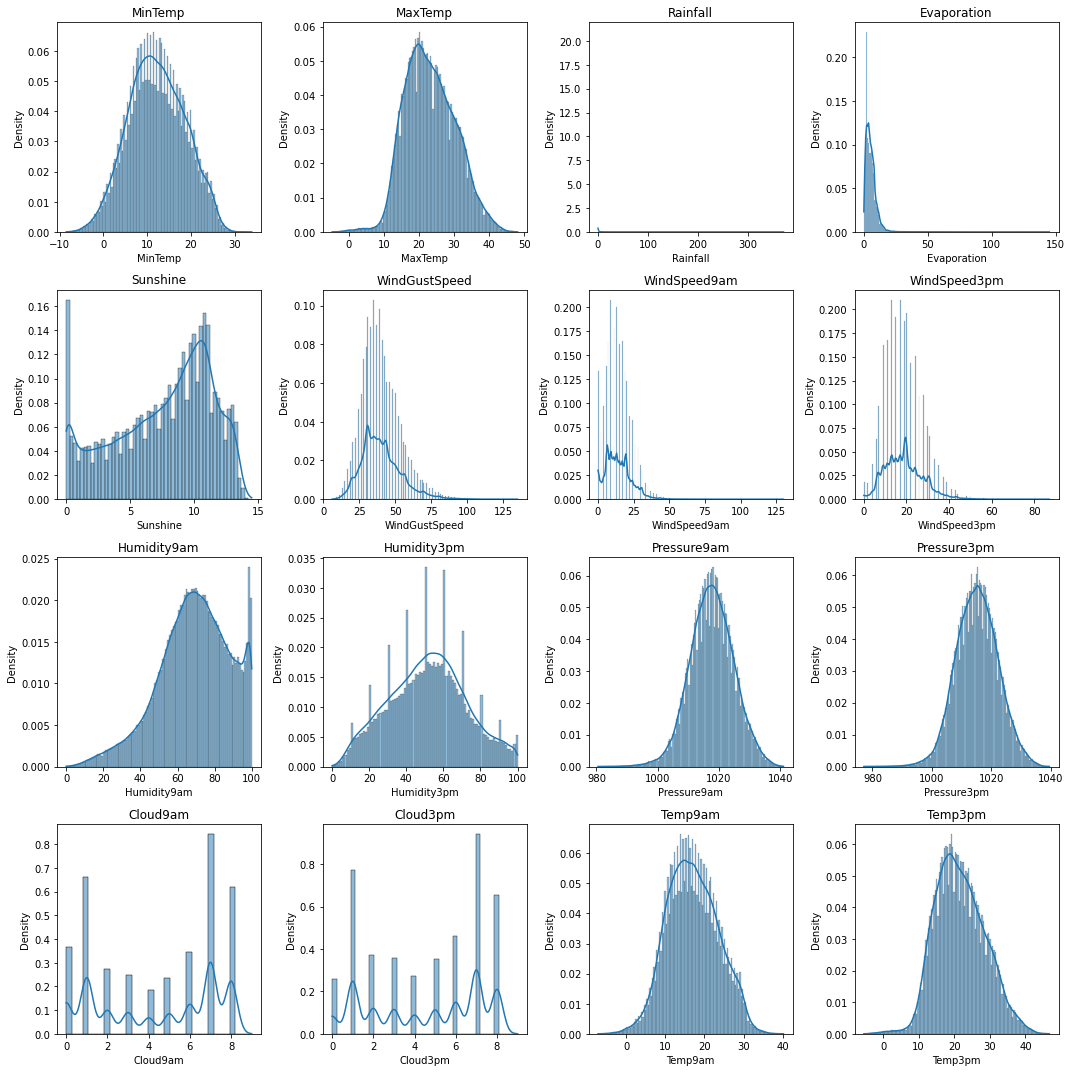

In [70]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
print(len(Numerical))    
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(Numerical, axes):
    print(col)
    ax.set_title(col)
    sns.hisplot(data=db[col], kde=True, stat='density', ax=ax)
    
fig.tight_layout()
plt.show()

In [71]:
# Using median for filling the missing value 
# since the data is skewed (using median will leave out the outliers)
for each_feature in Numerical:
    median_value = db[each_feature].median()
    db[each_feature] = db[each_feature].fillna(median_value)

In [72]:
print(db[Numerical].isna().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64


<AxesSubplot:>

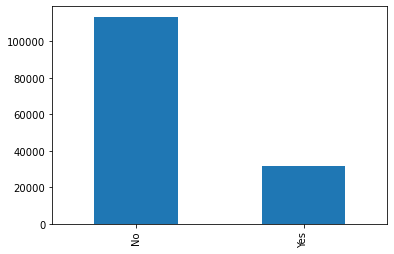

In [73]:
db["RainTomorrow"].value_counts().plot(kind='bar')

### from the above plot, we can conclude that the Target value (RainTomorrow) is unbalance

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

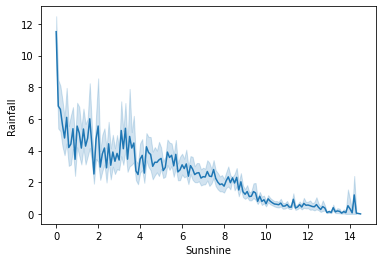

In [76]:
fig, axes = plt.subplots()
sns.lineplot(data=db, x='Sunshine', y='Rainfall')

In [77]:
print(Categorical)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [100]:
from sklearn.preprocessing import LabelEncoder
db['Location'] = LabelEncoder().fit_transform(db['Location'])
db['WindGustDir'] = LabelEncoder().fit_transform(db['WindGustDir'])
db['WindDir9am'] = LabelEncoder().fit_transform(db['WindDir9am'])
db['WindDir3pm'] = LabelEncoder().fit_transform(db['WindDir3pm'])
db['RainToday'].replace({'No':0, 'Yes':1}, inplace=True) 
db['RainTomorrow'].replace({'No':0, 'Yes':1}, inplace=True)


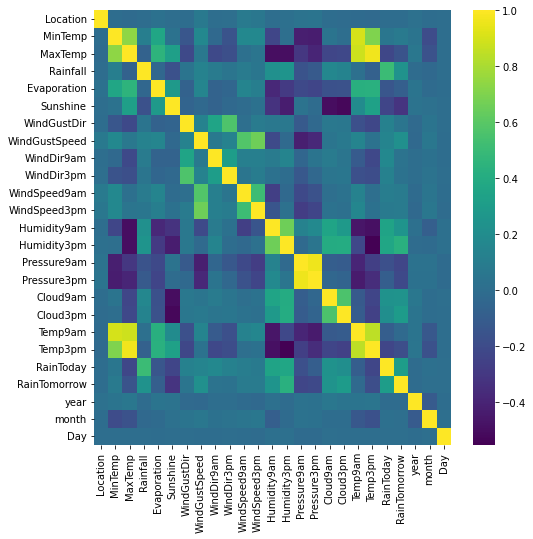

In [101]:
# plot correlation heatmap 
plt.figure(figsize=(8,8))
sns.heatmap(db.corr(), fmt=".2f", cmap='viridis');

In [102]:
# split the data into training and testing set (80:20)
X = db.drop(['RainTomorrow'], axis=1)
y = db['RainTomorrow']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(145460, 24) (145460,)


In [113]:
# hyperparameter grid for regressor 
n_estimator = [2000]                # number of trees in random forest, mostly correlated to the size of data
max_features = ['sqrt', 'auto']             # number of features in consideration at every split
max_depth = [20,50]                      # max levels allowed in each decision tree
min_samples_split = [2,5]                 # min samples to split a node
min_samples_leaf = [1,2]                 # min samples that can be stored in a leaf node
bootstrap = [True, False]                   # method used to sample data points (decide to use whole data for every decision tree or not))
criterion = ['squared_error']             # The criteria with which to split on each node
parameter_grid = {
    'n_estimators': n_estimator,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion' : criterion,
    'bootstrap': bootstrap
}

In [114]:
# find Best Hyperparameter using GridSearchCV
rnd = RandomForestRegressor()
CV_rnd = GridSearchCV(estimator=rnd, param_grid=parameter_grid, cv=3, n_jobs=-1)

CV_rnd.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error'], 'max_depth': [20, 50],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20]})

In [115]:
best_parameter = CV_rnd.best_params_
print(best_parameter)


{'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}


In [116]:

print(" Results from Grid Search " )
# best grid model 
print("\n The best estimator across ALL searched params:\n",CV_rnd.best_estimator_)
# best accuracy score 
print("\n The best score across ALL searched params:\n",CV_rnd.best_score_)
# best parameters
print("\n The best parameters across ALL searched params:\n",CV_rnd.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=20)

 The best score across ALL searched params:
 0.37821044544078336

 The best parameters across ALL searched params:
 {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}


In [118]:
randomForest = RandomForestRegressor(n_estimators=100 , max_features='sqrt', max_depth=20, min_samples_split=5, min_samples_leaf=2, criterion='squared_error', bootstrap=False)
randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5)

In [119]:
randomForest.feature_importances_

array([0.02710601, 0.03716577, 0.03629984, 0.05803173, 0.02076465,
       0.05987814, 0.02126706, 0.05402297, 0.02163613, 0.02339033,
       0.02339166, 0.02562111, 0.05052248, 0.19611346, 0.04899088,
       0.06089341, 0.01957876, 0.0463155 , 0.03522753, 0.03991631,
       0.02985947, 0.01821048, 0.01902252, 0.02677383])

In [137]:
names = [col for col in db.columns if col != "RainTomorrow"]
print(len(names))

24


In [138]:
f = randomForest.feature_importances_
for i in range(0, len(f)): 
    print("col {} importance: {}".format(names[i], f[i]))
    

col Location importance: 0.02710601453468378
col MinTemp importance: 0.03716576587348136
col MaxTemp importance: 0.036299838439011675
col Rainfall importance: 0.05803172520643888
col Evaporation importance: 0.020764648592351144
col Sunshine importance: 0.05987813803157283
col WindGustDir importance: 0.021267060743890443
col WindGustSpeed importance: 0.05402296903415531
col WindDir9am importance: 0.021636126169749404
col WindDir3pm importance: 0.02339032802589476
col WindSpeed9am importance: 0.023391661091869298
col WindSpeed3pm importance: 0.02562110758514409
col Humidity9am importance: 0.05052248443245602
col Humidity3pm importance: 0.1961134566109481
col Pressure9am importance: 0.04899088383950971
col Pressure3pm importance: 0.06089340585845481
col Cloud9am importance: 0.019578760274997675
col Cloud3pm importance: 0.046315496020123935
col Temp9am importance: 0.03522753056315145
col Temp3pm importance: 0.039916311749762116
col RainToday importance: 0.029859466047608328
col year import

In [139]:
randomForest.score(X_test, y_test)

0.39375872491812347

<AxesSubplot:>

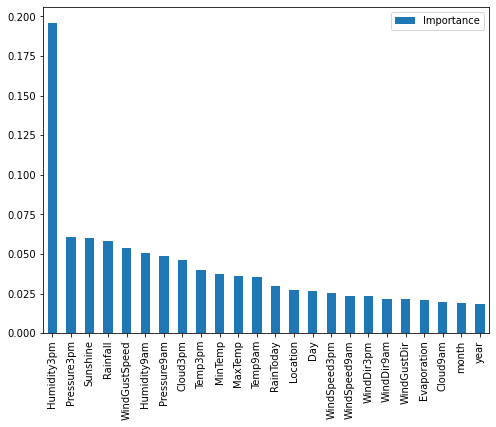

In [148]:
feat_importances = pd.DataFrame(randomForest.feature_importances_, index=names, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))